# Boston Housing Pricing Multiple Model Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

## Load Dataset

In [3]:
data = pd.read_csv("housing.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

## Exploratory Data Analysis

In [4]:
print(data.head)

<bound method NDFrame.head of         RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[489 rows x 4 columns]>


In [6]:
print(data.describe())

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


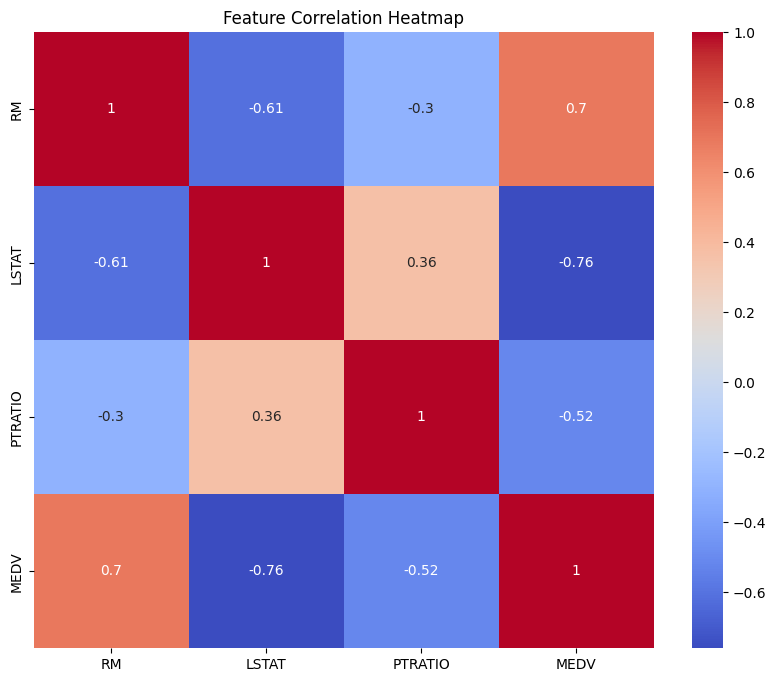

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Data Processing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Store Results

In [11]:
results = {}

## Model1: Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred_lr = lr.predict(X_test)
results['Linear Regression'] = {
    'R2': r2_score(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr)
}

## Model 2: Ridge Regression

In [14]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
results['Ridge Regression'] = {
    'R2':r2_score(y_test, y_pred_ridge),
    'MSE': mean_squared_error(y_test, y_pred_ridge)
}

## Model 3: Lasso Regression

In [15]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
results['Lasso Regression']= {
    'R2':r2_score(y_test, y_pred_lasso),
    'MSE': mean_squared_error(y_test, y_pred_lasso)
}

## Model 4: Polynomial Regression (degree = 2)

In [18]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)
results['Polynomial Regression (degree = 2)'] = {
    'R2':r2_score(y_test, y_pred_poly),
    'MSE': mean_squared_error(y_test, y_pred_poly)
}

## Model 6: XGBoost

In [20]:
xgbr = xgb.XGBRegressor(n_estimators = 100, random_state = 42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)
results['XGBoost'] = {
    'R2':r2_score(y_test, y_pred_xgb),
    'MSE': mean_squared_error(y_test, y_pred_xgb)
}

## Summarize Results

In [21]:
results_df = pd.DataFrame(results).T

In [23]:
print(results_df)

                                          R2           MSE
Linear Regression                   0.691093  6.789026e+09
Ridge Regression                    0.628047  8.174624e+09
Lasso Regression                    0.628027  8.175072e+09
Polynomial Regression (degree = 2)  0.742575  5.657585e+09
XGBoost                             0.811212  4.149110e+09


## Visualization

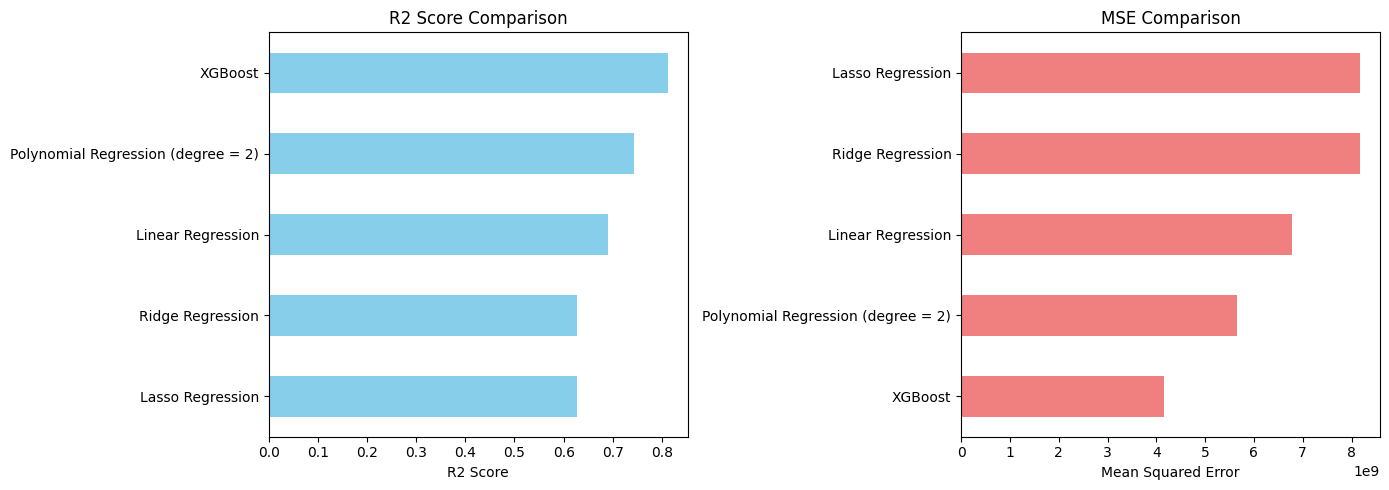

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
results_df['R2'].sort_values().plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title("R2 Score Comparison")
axes[0].set_xlabel("R2 Score")

#MSE
results_df['MSE'].sort_values().plot(kind='barh', ax=axes[1], color='lightcoral')
axes[1].set_title("MSE Comparison")
axes[1].set_xlabel("Mean Squared Error")

plt.tight_layout()
plt.show()

In [27]:
plt.savefig("model_comparison.png", dpi=300)

<Figure size 640x480 with 0 Axes>